In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from __future__ import print_function, division
from future.utils import iteritems
from builtins import range, input

from datetime import datetime
from scipy.stats import norm
from scipy.stats import multivariate_normal as mvn

Reading in and transforming data...
Training time: 0:00:00.412432
Train accuracy: 0.9886
Time to compute train accuracy: 0:00:03.622557 Train size: 10000
Test accuracy: 0.9412
Time to compute test accuracy: 0:00:03.793869 Test size: 10000


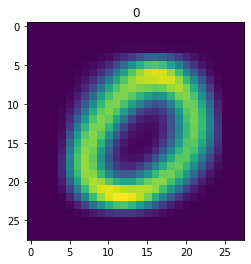

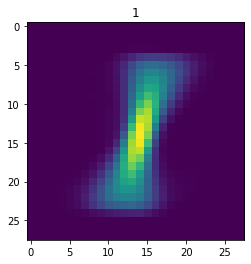

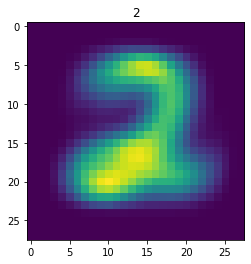

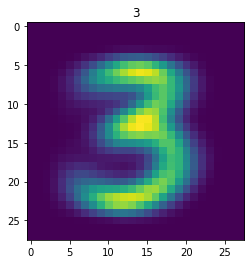

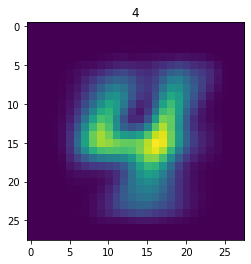

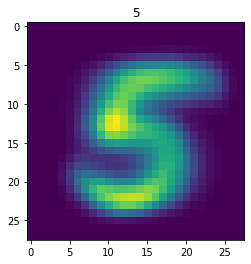

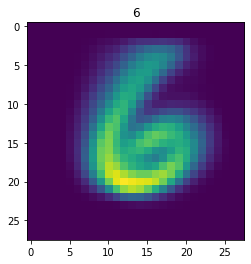

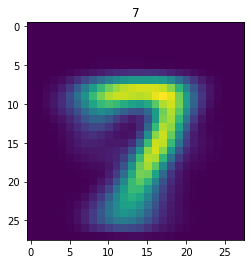

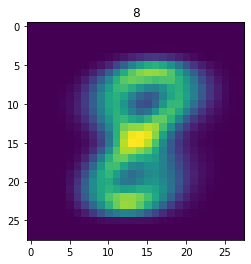

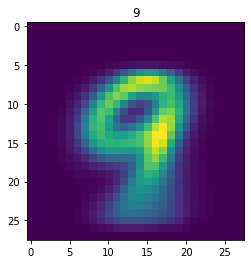

In [3]:
class Bayes(object):
    def fit(self, X, Y, smoothing=1e-2):
        N, D = X.shape
        self.gaussians = dict()
        self.priors = dict()
        labels = set(Y)
        for c in labels:
            current_x = X[Y == c]
            self.gaussians[c] = {
                'mean': current_x.mean(axis=0),
                'cov': np.cov(current_x.T) + np.eye(D)*smoothing,
            }
            self.priors[c] = float(len(Y[Y == c])) / len(Y)

    def score(self, X, Y):
        P = self.predict(X)
        return np.mean(P == Y)

    def predict(self, X):
        N, D = X.shape
        K = len(self.gaussians)
        P = np.zeros((N, K))
        for c, g in iteritems(self.gaussians):
            mean, cov = g['mean'], g['cov']
            P[:,c] = mvn.logpdf(X, mean=mean, cov=cov) + np.log(self.priors[c])
        return np.argmax(P, axis=1)


def get_data(limit=None):
    print("Reading in and transforming data...")
    df = pd.read_csv('mnist_train.csv')
    data = df.values
    np.random.shuffle(data)
    X = data[:, 1:] / 255.0 # data is from 0..255
    Y = data[:, 0]
    if limit is not None:
        X, Y = X[:limit], Y[:limit]
    return X, Y

if __name__ == '__main__':
    X, Y = get_data(20000)
    Ntrain = len(Y) // 2
    Xtrain, Ytrain = X[:Ntrain], Y[:Ntrain]
    Xtest, Ytest = X[Ntrain:], Y[Ntrain:]

    model = Bayes()
    t0 = datetime.now()
    model.fit(Xtrain, Ytrain)
    print("Training time:", (datetime.now() - t0))

    t0 = datetime.now()
    print("Train accuracy:", model.score(Xtrain, Ytrain))
    print("Time to compute train accuracy:", (datetime.now() - t0), "Train size:", len(Ytrain))

    t0 = datetime.now()
    print("Test accuracy:", model.score(Xtest, Ytest))
    print("Time to compute test accuracy:", (datetime.now() - t0), "Test size:", len(Ytest))

    # plot the mean of each class
    for c, g in iteritems(model.gaussians):
        plt.imshow(g['mean'].reshape(28, 28))
        plt.title(c)
        plt.show()

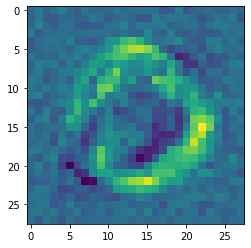

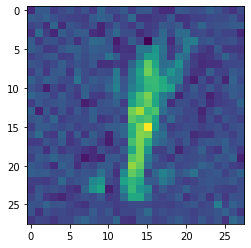

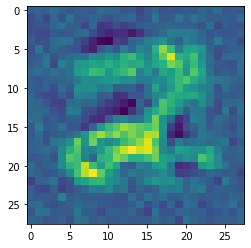

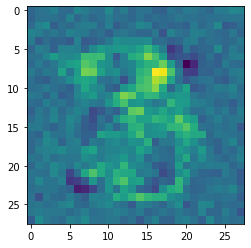

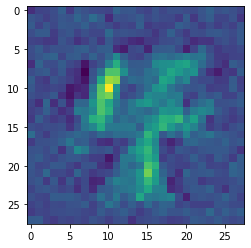

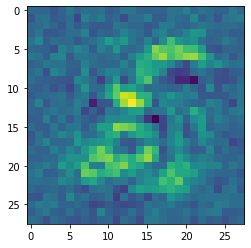

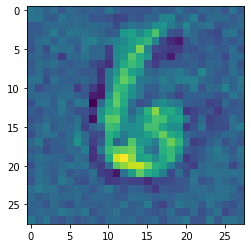

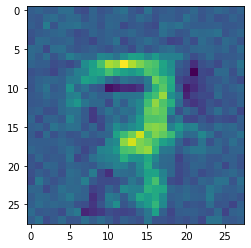

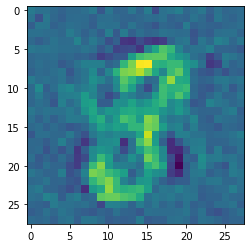

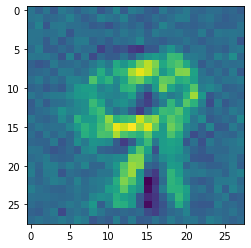

In [6]:
for label in range(0,10):
    D = len(model.gaussians[label]['mean'])
    sample = 255*np.random.multivariate_normal(model.gaussians[label]['mean'], model.gaussians[label]['cov'])

    pixels = sample.reshape((28, 28))
    plt.imshow(pixels)
    plt.show()